# PE 6.13 MeV

# Library

In [1]:
import struct
import numpy as np
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import gc
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy import signal
import matplotlib as mpl

# Define model and function

In [2]:
from scipy.optimize import curve_fit,fmin
from scipy.optimize import least_squares
import numpy
import pylab

class gaussian_model:
    def __init__(self, A,x0,sigma):
        self.A =A
        self.x0=x0
        self.sigma=sigma
        
    def gaussian(self ,x, A,x0,sigma):
         
        try:
            return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
        except sigma == 0 and A == 0 :
            return 0.000001
    
    def gaussian_fit(self, x, y):  
        mean = sum(x * y) / sum(y)
        sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))  
        def gauss(x, a, x0, sigma):
            return a * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
        try:  
            popt, pcov = curve_fit(gauss, x, y, p0=[1, mean, sigma], maxfev=1000)
            return popt
            print('Fitting Finished')
        except RuntimeError:
            print("Error - curve_fit failed")
            return  [0,0,0] 
class poly_model:
    def __init__(self, u1,u2,u3):
        self.u1 =u1
        self.u2 =u2
        self.u3 =u3
        
    def polynomial(self ,x,u1,u2,u3):
        return u1 + u2*x+ u3*(x**2)
    def polynomial_fit(self, x, y):
        def poly(self ,u1,u2,u3):
            return u1 + u2*x+ u3*(x**2)
        popt, pcov = curve_fit(poly, x, y)
        return popt
    
class expo_model:
    def __init__(self, H,A,t1):
        self.H =H
        self.A =A
        self.t1 =t1

    def Exponential(self,x,H,A,t1):
        return A*np.exp(-x/t1)+H 
    def Exponential_fit(self,x, y):
        def Expo(self,H,A,t1):
            return A*np.exp(-x/t1)+H 
        popt, pcov = curve_fit(Expo, x, y)
        return popt      
        
        
        
def polynomial(x,u1,u2,u3):
    return u1 + u2*x+ u3*(x**2)
def polynomial_fit(x, y):
    popt, pcov = curve_fit(polynomial, x, y)
    return popt

#def Exponential(x,H,A,t1):
#    return A*np.exp(-x/t1)+H 
#def Exponential_fit(x, y):
#    popt, pcov = curve_fit(Exponential, x, y)
#    return popt
def gauss_wo_baseline(x,  A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit_wo_baseline(x, y):  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    try:  
        popt, pcov = curve_fit(gauss_wo_baseline, x, y, p0=[1, mean, sigma], maxfev=1000)
        return popt
    except RuntimeError:
        print("Error - curve_fit failed")
        return  [0,mean,sigma] 
def gaussian_draw(x, A , mu, sig):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [3]:
def convolution(E,osc,x):
    gE_r=[]
    for Ei in x:
        #print(Ei)
        tot=0
        for Ej,os in zip(E,osc):
            p=abs((Ei-Ej)*100)
            
            if p <1201:
                tot+=os*transfer_fun_inter[int(p),1]
            else:
                pass
            #tot+=os*np.exp(-((((Ej-Ei)/sigma)**2)))
        gE_r.append(tot)
    gE=np.array(gE_r)
    return gE

# import data energy depth distribution

Finished


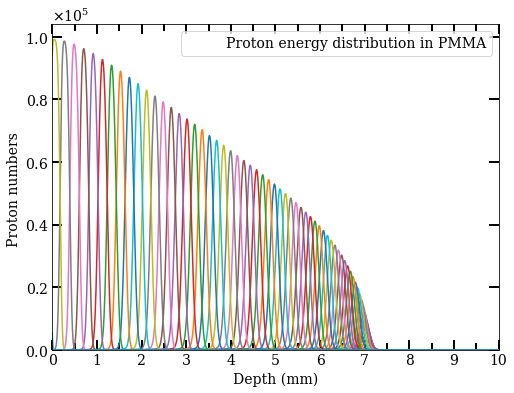

In [4]:
path = r"20200524_Total_in_one_file.xlsx"
#book = load_workbook(path)
#writer = pd.ExcelWriter(path, engine = 'openpyxl')
#writer.book = book

#PMMA_data_back= pd.read_excel(writer, sheet_name = 'PMMA', index_col=None,header=0)
#print(spectrum_raw_output)
#轉成array 矩陣
#spectrum_raw_output_back=spectrum_raw_output.values
#PMMA_data=PMMA_data_back.values

PMMA_data = (pd.read_excel(path, sheet_name = 'PMMA', index_col=None,header=0)).values
#plt.plot(PE_data[:,0],PE_data[:,1])


plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot([],[],' ',label='Proton energy distribution in PMMA' )

for i in np.arange(1,len(PMMA_data[0,:]),1):
    plt.plot(PMMA_data[:,0]*0.01,PMMA_data[:,i])

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=14)
ax.set_ylabel('Proton numbers ',fontsize=14)
ax.set_xlim(0,10)
ax.set_ylim(0,)
#ax.set_title('PMMA')
ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True)
plt.legend(fontsize=14)
print("Finished")


plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(PE_data[:,0],PE_data[:,1],label='proton energy in PE')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=14)
ax.set_ylabel('proton energy (MeV) ',fontsize=14)
ax.set_xlim(0,12)
ax.set_ylim(0,)
plt.legend(fontsize=16)
print("Finished")

# import crosssection data

In [5]:
# cross section
path = r"PG_XS_py.xlsx"
#book = load_workbook(path)
#writer = pd.ExcelWriter(path, engine = 'openpyxl')
#writer.book = book

C_44_XS=(pd.read_excel(path, sheet_name = 'C_4.4', index_col=None,header=0)).values
O_44_XS=(pd.read_excel(path, sheet_name = 'O_4.4', index_col=None,header=0)).values
O_61_XS=(pd.read_excel(path, sheet_name = 'O_6.13', index_col=None,header=0)).values
#print(spectrum_raw_output)
#轉成array 矩陣
#spectrum_raw_output_back=C_44_XS_read.values

print(C_44_XS ,O_44_XS ,O_61_XS)
print("Finished")

[[  1.      0.   ]
 [  2.      0.   ]
 [  3.      0.   ]
 [  4.      0.   ]
 [  5.      0.   ]
 [  5.42  232.58 ]
 [  5.93  114.31 ]
 [  6.49   59.4  ]
 [  6.99  113.34 ]
 [  7.59  291.56 ]
 [  7.99  253.89 ]
 [  8.22  319.44 ]
 [  8.38  301.68 ]
 [  8.52  262.3  ]
 [  8.586 262.1  ]
 [  8.594 263.4  ]
 [  8.721 270.   ]
 [  8.786 271.6  ]
 [  8.895 470.9  ]
 [  8.922 293.3  ]
 [  8.986 285.   ]
 [  9.124 395.2  ]
 [  9.186 369.3  ]
 [  9.325 240.   ]
 [  9.386 256.7  ]
 [  9.527 234.3  ]
 [  9.586 236.   ]
 [  9.727 226.6  ]
 [  9.787 236.2  ]
 [  9.929 236.8  ]
 [  9.985 246.3  ]
 [  9.987 230.7  ]
 [ 10.    265.   ]
 [ 10.13  278.7  ]
 [ 10.19  301.6  ]
 [ 10.39  323.3  ]
 [ 10.53  350.2  ]
 [ 10.59  296.2  ]
 [ 10.79  340.8  ]
 [ 10.93  396.8  ]
 [ 10.99  393.8  ]
 [ 10.99  409.3  ]
 [ 11.    317.   ]
 [ 11.19  300.7  ]
 [ 11.34  266.4  ]
 [ 11.39  274.   ]
 [ 11.56  270.5  ]
 [ 11.59  247.8  ]
 [ 11.74  272.2  ]
 [ 11.79  279.4  ]
 [ 11.96  272.2  ]
 [ 11.99  272.2  ]
 [ 11.99  28

## Use two model to fitting

(0.0, 40.0)

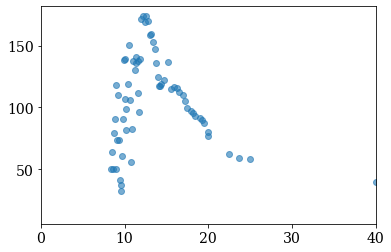

In [6]:
plt.scatter(O_61_XS[:,0],O_61_XS [:,1], alpha=0.6,label='experiment data point')
plt.xlim(0,40)

Final result 23.34838606374924 579.3368010758778 8.742013994987168
[ 23.34838606 579.33680108   8.74201399]
Gaussian Final result 157.23146609206356 13.448859344787207 3.4740130918664063
[157.23146609  13.44885934   3.47401309]
[1424] [[14.24]] [143.04670309]
Finished


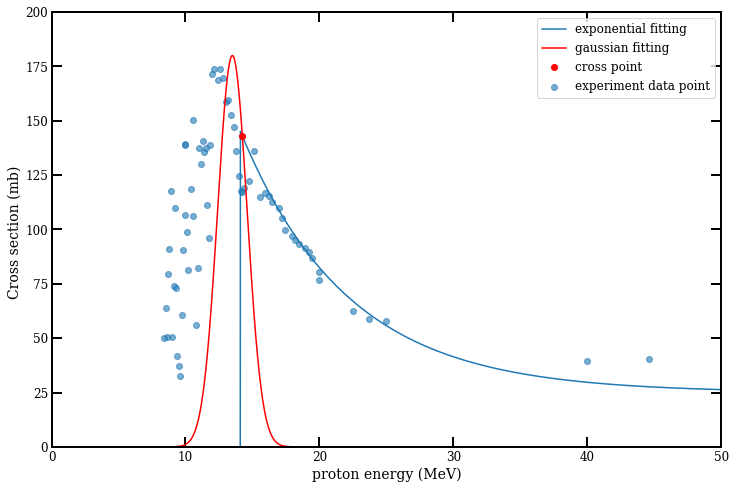

In [381]:

X_axis=np.arange(0,150,0.01)[:,np.newaxis]
xdata=O_61_XS[50:-1,0]
ydata=O_61_XS[50:-1,1]
u1,u2,u3=expo_model.Exponential_fit(1,xdata, ydata)
print('Final result',u1,u2,u3)
u1=25
u2=700
u3=8
polynumial_curve = expo_model.Exponential(1,X_axis[:,0],u1,u2,u3)

res=least_squares(expo_model.Exponential_fit,x0= [1,1,1],method='trf',loss='huber',f_scale=10,args=(xdata, ydata))
print(res.fun)

xdata_gauss=O_61_XS[0:43,0]
ydata_gauss=O_61_XS[0:43,1]
A,X0,sigma = gaussian_model.gaussian_fit(1,xdata_gauss,ydata_gauss)
print('Gaussian Final result',A,X0,sigma)
res=least_squares( gaussian_model.gaussian_fit,x0= [1,1,1],method='trf',loss='huber',f_scale=2,args=(xdata_gauss,ydata_gauss))
print(res.fun)
A=180
X0=13.5
sigma=1.1
gaussian_curve = gaussian_model.gaussian (1,X_axis[:,0],A,X0,sigma )

polynumial_curve[0:1410]=0


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(X_axis[:,0],polynumial_curve,label='exponential fitting')
plt.plot(X_axis[:,0],gaussian_curve,'r',label='gaussian fitting')
#plt.plot(X_axis[:,0],polynumial_curve+gaussian_curve)
plt.scatter(O_61_XS[:,0],O_61_XS [:,1], alpha=0.6,label='experiment data point')
idx = np.argwhere(np.diff(np.sign(polynumial_curve - gaussian_curve))).flatten()
plt.plot(X_axis[idx], polynumial_curve[idx], 'ro',label='cross point')
print(idx,X_axis[idx], polynumial_curve[idx] )
plt.ylim(0,200)
plt.xlim(0,50)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('proton energy (MeV)',fontsize=14)
ax.set_ylabel('Cross section (mb) ',fontsize=14)

plt.legend(fontsize=12)
print("Finished")

## combine two curve

<class 'numpy.ndarray'>
Finished


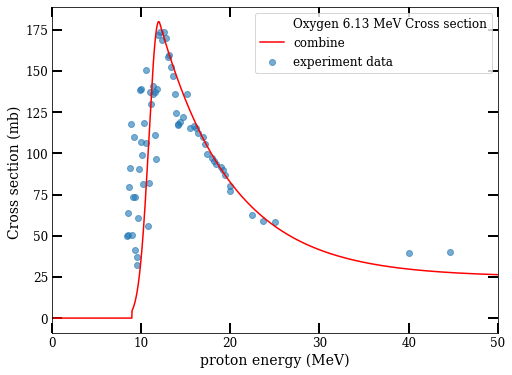

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
gaussian_curve[0:900]=0

cross_point=int(idx)
print(type(gaussian_curve[0:cross_point]))
XS_new_curve=np.append(gaussian_curve[0:cross_point+1], polynumial_curve[cross_point:-1])
plt.plot([],[],' ',label='Oxygen 6.13 MeV Cross section')
plt.scatter(O_61_XS[:,0],O_61_XS [:,1], alpha=0.6,label='experiment data')
plt.plot(X_axis[:,0],XS_new_curve,'-r',label='combine')

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('proton energy (MeV)',fontsize=14)
ax.set_ylabel('Cross section (mb) ',fontsize=14)
#ax.set_title(,fontsize=14)
ax.set_xlim(0,50)
plt.legend(fontsize=12)
print("Finished")


## Smoothing two curves

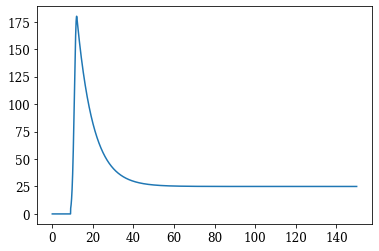

In [9]:
#Smooth 
#XS_new_curve_smooth=[]
XS_new_curve_smooth = signal.savgol_filter(XS_new_curve, 5, 3)  ##Smooth control
#XS_new_curve_smooth=XS_new_curve
XS_new_curve_smooth[0:900]=0
#選擇舊的Y數據點 #101表示正負50個點 只能奇數 #3 表示3維polynomial
plt.plot(X_axis[:,0],XS_new_curve_smooth)

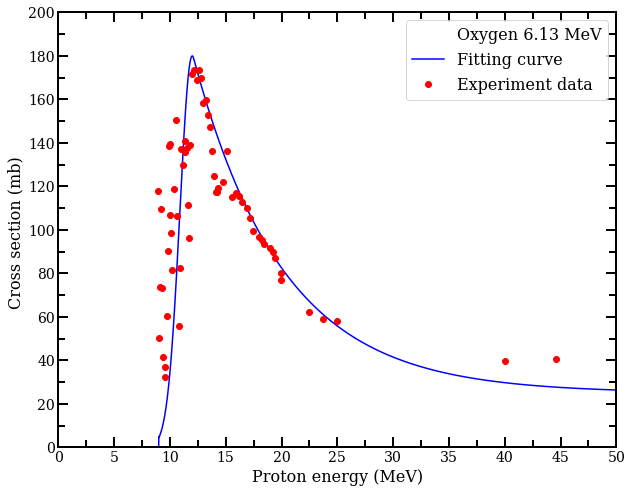

In [10]:
# plt.rc 指令要放在最前面
plt.rc('font', family='serif')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(10,8))        # 圖片大小
ax = fig.add_subplot(1, 1, 1) 

ax.plot([],[],' ',label = 'Oxygen 6.13 MeV')
#Smooth 
#XS_new_curve_smooth = signal.savgol_filter(XS_new_curve, 201, 3)  ##Smooth control
#選擇舊的Y數據點 #101表示正負50個點 只能奇數 #3 表示3維polynomial
#XS_new_curve_smooth[0:500]=0
ax.plot(X_axis[:,0],XS_new_curve_smooth,'b',label = 'Fitting curve')
ax.plot(O_61_XS[5:,0],O_61_XS [5:,1],'or',label='Experiment data')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Proton energy (MeV)',fontsize=16)
ax.set_ylabel('Cross section (mb) ',fontsize=16)
ax.set_xlim(0,50)
ax.set_ylim(0,200)
plt.legend(fontsize=16)

In [11]:
print(np.argmax(XS_new_curve_smooth))

1200


In [12]:
print('Total sample in the curve: ',len(XS_new_curve_smooth))
print('Energy Resolaution is: 0.01 MeV')

Total sample in the curve:  15000
Energy Resolaution is: 0.01 MeV


In [13]:
XS_new_curve_smooth_01=[]
XS_new_curve_smooth_01= np.array([(XS_new_curve_smooth[i]) for i in np.arange(0,15000,10)])
print(XS_new_curve_smooth_01.shape)
XS_new_curve_smooth_01_c= np.column_stack((np.arange(0,15000,10)/100,XS_new_curve_smooth_01))
print(XS_new_curve_smooth_01_c)

(1500,)
[[0.00000000e+00 0.00000000e+00]
 [1.00000000e-01 0.00000000e+00]
 [2.00000000e-01 0.00000000e+00]
 ...
 [1.49700000e+02 2.50000052e+01]
 [1.49800000e+02 2.50000052e+01]
 [1.49900000e+02 2.50000051e+01]]


XS_new_curve_smooth_O_pd = pd.DataFrame(XS_new_curve_smooth_01_c)


path = r'Cross_section_fitting.xlsx'

book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

XS_new_curve_smooth_O_pd.to_excel(writer, sheet_name = 'XS_Oxygen_6.13MeV', index=False)
writer.save()
writer.close()

print("Finished")

## subtract the cross section for convolution

No handles with labels found to put in legend.


[ 42.00623999  43.10304824  44.27059454  45.51344111  46.83644439
  48.24477406  49.74393318  51.33977977  53.03854961  54.84688069
  56.77183912  58.82094669  61.00221034  63.32415342  65.79584896
  68.42695516  71.22775314  74.20918707  77.38290696  80.7613142
  84.35760999  88.18584693  92.26098394  96.5989447  101.2166799
 106.13223343 111.36481292 116.9348648  122.86415417 129.17584984
 135.8946149  143.04670309 150.66006133 158.76443899 167.39150411
 176.57496712 175.4107564  142.66779762  94.37683921  50.77788812
  22.22048708   7.90864803   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
60
2975


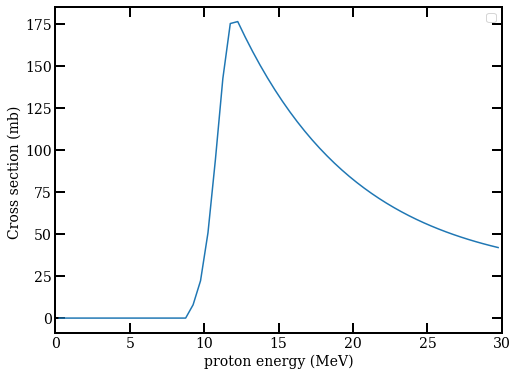

In [14]:
XS_025MeV_x_axis=np.arange(25,3000,50)
XS_025MeV=XS_new_curve_smooth[XS_025MeV_x_axis]

XS_025MeV_rev= XS_025MeV[::-1]
print(XS_025MeV_rev)
print(len(XS_025MeV_rev))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(XS_025MeV_x_axis*0.01,XS_025MeV)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('proton energy (MeV)',fontsize=14)
ax.set_ylabel('Cross section (mb) ',fontsize=14)
ax.set_xlim(0,30)
plt.legend(fontsize=12)



print(XS_025MeV_x_axis[-1])

# Cross section of energy times numbers
$E(\sigma)\times N(d)$

In [15]:
path = r"20200524_Total_in_one_file.xlsx"
#book = load_workbook(path)
#writer = pd.ExcelWriter(path, engine = 'openpyxl')
#writer.book = book

#PMMA_data_back= pd.read_excel(writer, sheet_name = 'PMMA', index_col=None,header=0)
PMMA_data_for_XS=(pd.read_excel(path, sheet_name = 'PMMA', index_col=None,header=0)).values
print(PMMA_data_for_XS)


[[    0     0     3 ... 93875  5450     0]
 [    1     0     3 ... 96995  2319     0]
 [    2     0     0 ... 98430   873     0]
 ...
 [  997     0     0 ...     0     0     0]
 [  998     0     0 ...     0     0     0]
 [  999     0     0 ...     0     0     0]]


(1000, 61)


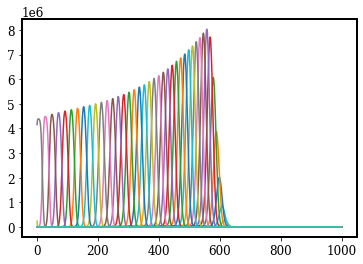

In [16]:
#print(XS_025MeV)
#print(PE_data_for_XS)
Yield_of_E_d_O=PMMA_data_for_XS
for i in np.arange(0,60,1):
    Yield_of_E_d_temp=[]
    Yield_of_E_d_temp=XS_025MeV[i]*PMMA_data_for_XS [:,i+1][:,np.newaxis]
    plt.plot(Yield_of_E_d_temp)
    Yield_of_E_d_O[:,i+1]=Yield_of_E_d_temp[:,0]
print(Yield_of_E_d_O.shape)

(1000,)


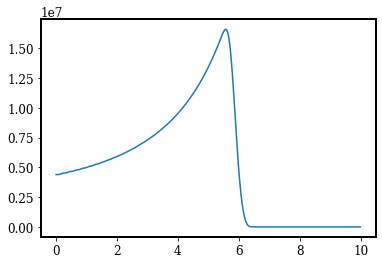

In [17]:
Yield_of_d_O=[]
for i in np.arange(0,len(Yield_of_E_d_O[:,0]),1):
    Yield_of_d_temp=sum(Yield_of_E_d_O[i,:])
    Yield_of_d_O=np.append(Yield_of_d_O,Yield_of_d_temp) 
plt.plot(np.arange(0,len(Yield_of_d_O[:]),1)*0.01,Yield_of_d_O[:])
print(Yield_of_d_O.shape)

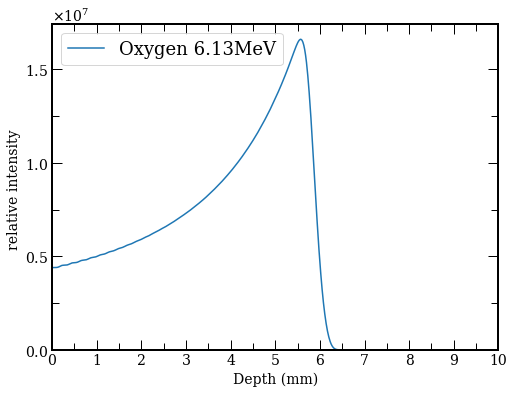

In [18]:
# plt.rc 指令要放在最前面
plt.rc('font', family='serif')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
Yield_of_d_x =np.arange(0,len(Yield_of_d_O[:]),1)*0.01
ax.plot(Yield_of_d_x,Yield_of_d_O[:],label='Oxygen 6.13MeV')

# Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))    # x軸主格線的'寬度'(ex: 每10畫一個主格線)
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(.5))     # x軸副格線的'寬度'(ex: 每5畫一個副格線)
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5*10**7))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25*10**7))

ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線
ax.set_xlabel('Depth (mm)',fontsize=14)
ax.set_ylabel('relative intensity ',fontsize=14)
ax.set_ylim(0,)
ax.set_xlim(0,10)
#ax.set_xticks(np.arange(0,110,10))

ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True) # y軸改為科學記號表示
plt.legend(fontsize=18)

In [19]:
# import experiment data

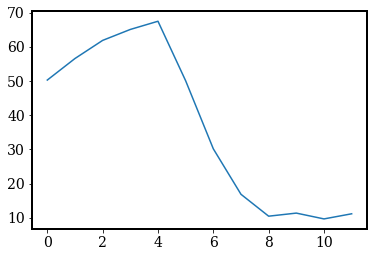

In [20]:
path = r"20200715New_PMMA_Region_counts.xlsx"
O_exp_data= (pd.read_excel(path, sheet_name = '20210526_PMMA_1of10s', index_col=None,header=0, engine = 'openpyxl')).values
O_exp_61 = O_exp_data[:,3]
O_exp_x = O_exp_data[:,0]

plt.plot(O_exp_x,O_exp_61)

In [21]:
# import transfer function

Finished
[[0.0000e+00 6.8845e-06]
 [1.0000e-01 6.8620e-06]
 [2.0000e-01 6.8985e-06]
 [3.0000e-01 6.9355e-06]
 [4.0000e-01 6.8385e-06]
 [5.0000e-01 6.9085e-06]
 [6.0000e-01 6.7725e-06]
 [7.0000e-01 6.8555e-06]
 [8.0000e-01 6.7675e-06]
 [9.0000e-01 6.8490e-06]
 [1.0000e+00 6.9170e-06]
 [1.1000e+00 5.8585e-06]
 [1.2000e+00 4.8850e-06]
 [1.3000e+00 3.9660e-06]
 [1.4000e+00 2.9970e-06]
 [1.5000e+00 1.9800e-06]
 [1.6000e+00 1.0585e-06]
 [1.7000e+00 4.9050e-07]
 [1.8000e+00 2.3650e-07]
 [1.9000e+00 1.1800e-07]
 [2.0000e+00 6.7500e-08]
 [2.1000e+00 3.1000e-08]
 [2.2000e+00 2.3500e-08]
 [2.3000e+00 6.0000e-09]
 [2.4000e+00 5.0000e-10]
 [2.5000e+00 0.0000e+00]
 [3.0000e+00 0.0000e+00]
 [4.0000e+00 0.0000e+00]
 [5.0000e+00 0.0000e+00]
 [6.0000e+00 0.0000e+00]]


(0.0, 1.05)

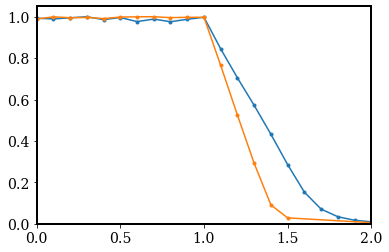

In [22]:
path = r"deconvolution_tranfer_function_2.xlsx"
transfer_fun_back= pd.read_excel(path, sheet_name = '2021_Transfer_0', index_col=None,header=0, engine = 'openpyxl')

path2 = r"deconvolution_tranfer_function_2.xlsx"
transfer_fun_back_2= pd.read_excel(path, sheet_name = 'Tranfer_0', index_col=None,header=0, engine = 'openpyxl')


#depth_yield_back = pd.read_excel(writer, sheet_name = 'depth_yield_1min', index_col=None,header=0)
#print(spectrum_raw_output)
#轉成array 矩陣
#spectrum_raw_output_back=spectrum_raw_output.values


#print(transfer_fun_back)
#print(depth_yield_back)
print("Finished")
transfer_fun = transfer_fun_back.values
transfer_fun_2 = transfer_fun_back_2.values
#depth_yield_exp  = depth_yield_back.values
print(transfer_fun)
plt.plot(transfer_fun[:,0],transfer_fun[:,1]/transfer_fun[:,1].max(),'.-')
plt.plot(transfer_fun_2[:,0],transfer_fun_2[:,1]/transfer_fun_2[:,1].max(),'.-')
plt.xlim(0,2)
plt.ylim(0,)

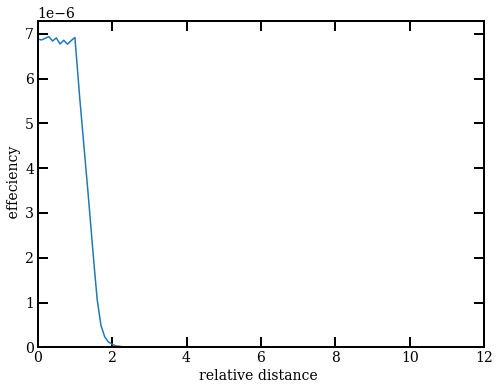

In [23]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

# 把Tranfer function 分別抓出來
transfer_fun_x= transfer_fun[:,0]
transfer_fun_y= transfer_fun[:,1]
#transfer_fun_y= (transfer_fun[:,1]/max(transfer_fun[:,1])) # Normalized
# 對Tranfer function 做 interpolation
transfer_fun_x_inter = np.arange(0,15,0.01)
transfer_fun_y_inter_temp = interp1d(transfer_fun_x, transfer_fun_y,fill_value="extrapolate") 
transfer_fun_y_inter = transfer_fun_y_inter_temp(transfer_fun_x_inter)
#transfer_fun_y_inter = signal.savgol_filter(transfer_fun_y_inter, 51, 3)
transfer_fun_inter = np.column_stack((transfer_fun_x_inter,transfer_fun_y_inter)) 
#print(transfer_fun_inter[:,1])
plt.plot(transfer_fun_inter[:,0],transfer_fun_inter[:,1])


plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('relative distance ',fontsize=14)
ax.set_ylabel(' effeciency',fontsize=14)
ax.set_xlim(0,12)
ax.set_ylim(0,)
ax.ticklabel_format(axis='y',style='sci',scilimits=(10,3))

In [24]:
def convolution(d,osc,x):
    #
    gE_r=[]
    for x_i in x:
        #print('x_i part', x_i)
        tot=0
        for dj,os in zip(d,osc):
            p=abs((x_i-dj)*100)
            #print(p)
            if p <1201:
                tot+=os*transfer_fun_inter[int(p),1]
                #print(transfer_fun_inter[int(p),1])
            else:
                pass
            #tot+=os*np.exp(-((((Ej-Ei)/sigma)**2)))
        gE_r.append(tot)
    gE=np.array(gE_r)
    return gE

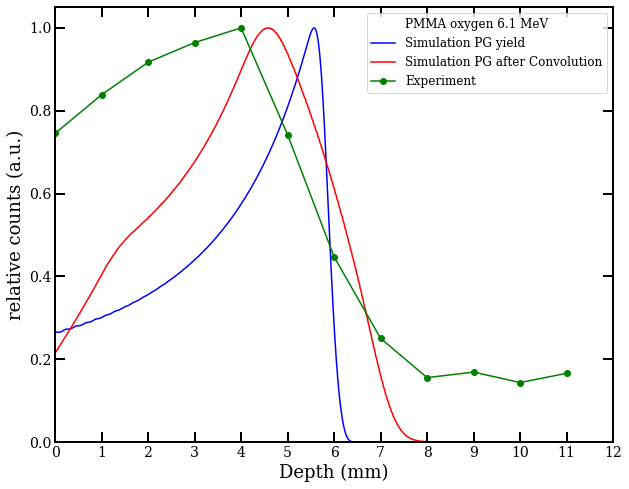

In [25]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot([], [], ' ', label="PMMA oxygen 6.1 MeV")
new_x =  np.arange(0,20.01,0.01)

depth_yield_conved =  convolution(Yield_of_d_x,Yield_of_d_O,new_x)
O_exp_61_norm = O_exp_61/O_exp_61.max()
ax.plot(Yield_of_d_x,Yield_of_d_O/max(Yield_of_d_O),'b',label='Simulation PG yield')
ax.plot(new_x,depth_yield_conved/max(depth_yield_conved),'r',label='Simulation PG after Convolution')
ax.plot(O_exp_x,O_exp_61_norm,'o-g',label='Experiment')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=18)
ax.set_ylabel('relative counts (a.u.)',fontsize=18)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xlim(0,12)
ax.set_ylim(0,)
plt.legend(loc='upper right',fontsize=12)

In [596]:
measurement_error = [8.149233093,
10.14100587,
10.10395962,
6.090155991,
8.309632964,
6.040695324,
7.291090453,
4.678675026,
2.418677324,
2.973213749,
2.758622845,
3.218695388]

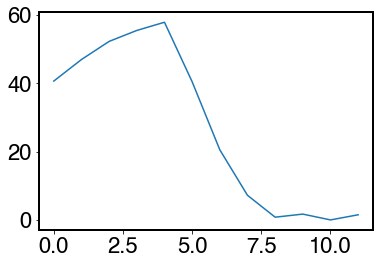

In [1242]:
O_exp_61_Wo_BG = O_exp_61 - O_exp_61.min()
#O_exp_61_Wo_BG[0]=35
#O_exp_61_Wo_BG[1]=48
#O_exp_61_Wo_BG[2]=45
#O_exp_61_Wo_BG[3]=52
plt.plot(O_exp_61_Wo_BG)

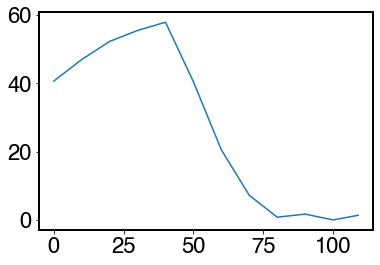

In [1243]:
exp_x = np.arange(0,11,0.1)
exp_y_inter_temp = interp1d(O_exp_x, O_exp_61_Wo_BG,fill_value="extrapolate")
exp_y_inter = exp_y_inter_temp(exp_x)
plt.plot(exp_y_inter)

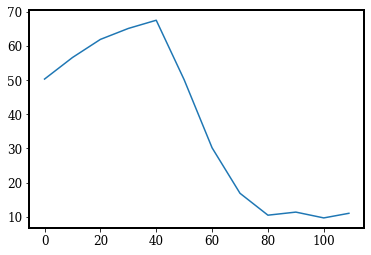

In [1133]:
exp_x = np.arange(0,11,0.1)
exp_y_inter_w_BG_temp = interp1d(O_exp_x, O_exp_61,fill_value="extrapolate")
exp_y_inter_w_BG = exp_y_inter_w_BG_temp(exp_x)
plt.plot(exp_y_inter_w_BG)

61


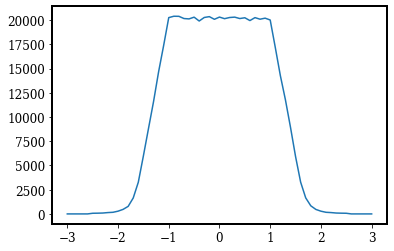

In [1134]:
path = r"For_deconvolution.xlsx"

T_fun=(pd.read_excel(path, sheet_name = 'Transfer', index_col=None,header=0, engine = 'openpyxl')).values
plt.plot(T_fun[:,0],T_fun[:,1])
print(len(T_fun[:,1]))

In [1087]:
transfer_fun_inter_norm = np.append(T_fun[30:,1],np.zeros(80)) 
print(transfer_fun_inter_norm.shape)

response_function_Matrix=[]
for i in np.arange(0,110,1):
    response_function_Matrix_single=[]
    for j in np.arange(0,110,1):
        #print('i= ',i,' j= ',j)
        if j < i :
            response_function_Matrix_single = np.append(response_function_Matrix_single,transfer_fun_inter_norm[i-j])
        if j >= i:
            #print(transfer_fun_inter[j,1])
            response_function_Matrix_single = np.append(response_function_Matrix_single,transfer_fun_inter_norm[j-i])
            #print(response_function_Matrix_single)
        response_function_Matrix_single=response_function_Matrix_single[:,np.newaxis]

    if i == 0 :
        response_function_Matrix = response_function_Matrix_single
    else:
        response_function_Matrix = np.column_stack((response_function_Matrix,response_function_Matrix_single))
    
print(response_function_Matrix.shape)

(111,)
(110, 110)


In [1088]:
print(response_function_Matrix.shape)
response_function_Matrix_norm = response_function_Matrix
for i in np.arange(0,110,1):
    response_function_Matrix_norm[:,i] = response_function_Matrix[:,i]/max(response_function_Matrix[:,i])
    

(110, 110)


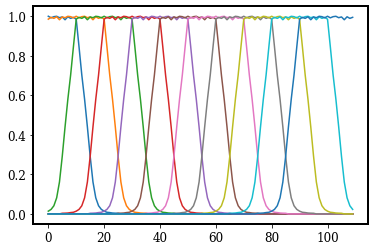

In [1089]:
for i in np.arange(0,110,10):
        plt.plot(response_function_Matrix_norm[:,i])
        

In [1090]:
x_base = np.arange(0,11,0.1)

In [1091]:
from scipy.optimize import minimize

In [1092]:
def polynomial(x,u1,u2,u3):
    return u1 + u2*x+ u3*(x**2)
def gaussian(x,  A,x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def polynomial_fit(x, y):
    popt, pcov = curve_fit(polynomial, x, y)
    return popt
def gauss_fit_wo_baseline(x, y):  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss_wo_baseline, x, y)
    return popt
def Exponential(x,H,A,t1):
    return A*np.exp(x/t1)+H 
def Exponential_fit(x, y):
    popt, pcov = curve_fit(Exponential, x, y)
    return popt




In [1093]:
def exp_mixed_curve(u1, u2, u3,sigma):
    global x_base,cut_point,Simulation_Yield
    expo = Exponential(x_base, u1, u2, u3)
    amp = expo[int(cut_point)]
    #print(u1, u2, u3)
    gauss =gaussian(x_base,amp,(cut_point)/10,sigma)
    expo[int(cut_point):]=0
    gauss[:int(cut_point)] = 0
    mixed_curve = expo+gauss
    return mixed_curve

In [1094]:
def convolution_mini_equation(input_var):
    global Simulation_Yield
    global cut_point
    mixed_output = exp_mixed_curve(input_var[0],input_var[1],input_var[2],input_var[3],input_var[4])
    conv_output = mixed_output.dot(response_function_Matrix_norm)
    ROI_in_fun = np.arange(20,60,1)
    Final_out = conv_output[ROI_in_fun] - S_yield_conv_norm[ROI_in_fun]
    STD = sum(Final_out**2)
    return STD

In [1095]:
def exp_convolution_mini_equation_sigma(input_var):
    global exp_y_inter,exp_y_inter_w_BG
    global cut_point
    mixed_output = exp_deconv_mixed_curve(input_var[0],input_var[1],input_var[2],input_var[3])
    conv_output = mixed_output.dot(response_function_Matrix_norm)
    ROI_in_fun = np.arange(0,80,1)
    ROI_for_sigma = np.arange(0,10,1)
    
    #Final_out = ((conv_output[ROI_in_fun])/conv_output[ROI_in_fun].max() - exp_y_inter[ROI_in_fun]/exp_y_inter[ROI_in_fun].max())
    #Final_out = conv_output[ROI_in_fun]- exp_y_inter_wo_BG[ROI_in_fun]
    Convolution_curve = (conv_output[ROI_in_fun])/conv_output[ROI_in_fun].max()
    experimental_curve = exp_y_inter[ROI_in_fun]/exp_y_inter[ROI_in_fun].max()
    sigma = measurement_error/exp_y_inter[ROI_in_fun].max()
    Final_out_sigma=0
    times = 1
    for i in ROI_for_sigma:
        Final_out_sigma += ((times*Convolution_curve[i]-times*experimental_curve[i])**2)/(times*sigma[i])**2

    
    return (Final_out_sigma-1)**2

In [1096]:
def exp_deconv_mixed_curve_BG(u1, u2, u3,sigma,BG):
    global x_base,cut_point
    expo = Exponential(x_base, u1, u2, u3)
    amp = expo[int(cut_point)]
    #print(u1, u2, u3)
    gauss =gaussian(x_base,amp,(cut_point)/10,sigma)
    expo[int(cut_point):]=0
    gauss[:int(cut_point)] = 0
    mixed_curve = expo+gauss+BG
    return mixed_curve

In [1097]:
def exp_convolution_mini_equation_BG(input_var):
    global exp_y_inter,exp_y_inter_w_BG
    global cut_point
    mixed_output = exp_deconv_mixed_curve_BG(input_var[0],input_var[1],input_var[2],input_var[3],input_var[4])
    conv_output = mixed_output.dot(response_function_Matrix_norm)
    ROI_in_fun = np.arange(0,100,1)
    Final_out = ((conv_output[ROI_in_fun])/conv_output[ROI_in_fun].max() - exp_y_inter_w_BG[ROI_in_fun]/exp_y_inter_w_BG[ROI_in_fun].max())
    #Final_out = conv_output[ROI_in_fun]- exp_y_inter_wo_BG[ROI_in_fun]
    STD = sum(Final_out**2)
    return STD



In [1098]:
def exp_deconv_mixed_curve(u1, u2, u3,sigma):
    global x_base,cut_point
    expo = Exponential(x_base, u1, u2, u3)
    amp = expo[int(cut_point)]
    #print(u1, u2, u3)
    gauss =gaussian(x_base,amp,(cut_point)/10,sigma)
    expo[int(cut_point):]=0
    gauss[:int(cut_point)] = 0
    mixed_curve = expo+gauss
    return mixed_curve

In [1253]:
def exp_convolution_mini_equation(input_var):
    global exp_y_inter,exp_y_inter_w_BG
    global cut_point
    mixed_output = exp_deconv_mixed_curve(input_var[0],input_var[1],input_var[2],input_var[3])
    conv_output = mixed_output.dot(response_function_Matrix_norm)
    ROI_in_fun = np.arange(20,60,10)
    Final_out = (conv_output[ROI_in_fun])/conv_output[ROI_in_fun].max() - exp_y_inter[ROI_in_fun]/exp_y_inter[ROI_in_fun].max()
    #Final_out = conv_output[ROI_in_fun]- exp_y_inter_wo_BG[ROI_in_fun]
    STD = sum(Final_out**2)
    return STD


In [1254]:
deconvolution_intial_guess = np.array([1,1,1,1])
bnds = ((0,10000), (0,10000),(0,10000),(-10,10000))
for i in np.arange(30,70,1):
    cut_point = i
    print(cut_point)
    conv_output_min = minimize(exp_convolution_mini_equation,
                               deconvolution_intial_guess,
                               method='L-BFGS-B',
                               bounds=bnds,
                               options={'maxiter':100000000,'gtol': 1e-10})
    print(conv_output_min.fun)


30
0.002682979044281085
31
0.002811570043330438
32


<ipython-input-1092-4dfc0f400b72>:15: RuntimeWarning: divide by zero encountered in true_divide
  return A*np.exp(x/t1)+H
<ipython-input-1092-4dfc0f400b72>:15: RuntimeWarning: invalid value encountered in true_divide
  return A*np.exp(x/t1)+H
<ipython-input-1092-4dfc0f400b72>:15: RuntimeWarning: invalid value encountered in multiply
  return A*np.exp(x/t1)+H
<ipython-input-1092-4dfc0f400b72>:15: RuntimeWarning: overflow encountered in exp
  return A*np.exp(x/t1)+H


0.002944873806967059
33
0.0029135093364894343
34
0.002965218908047822
35
0.0029639659850449578
36
0.0029034038160701842
37
0.0029887401171632736
38
0.0025981889929779876
39
0.0023675118161877954
40
0.002453178630841327
41
0.0018525313997611464
42
0.0013702260408094491
43
0.0017588512511657077
44
0.00019036777047049187
45
7.565616316309615e-05
46
9.683204623993324e-07
47
6.095973498613848e-09
48
2.62439893329716e-10
49
4.7809736724387205e-11
50
2.55315326555971e-10
51
3.2567661392772115e-05
52
1.1945899570932142e-05
53
4.232211428521799e-06
54
5.3275272021868186e-05
55
0.0011954047710917531
56
0.004443760406824971
57
0.016493395011002006
58
0.02320820945553119
59
0.03261806922768172
60
0.044564826797446395
61
0.05690844331070931
62
0.06862561532869685
63
0.07929198749672114
64
0.0879930101576003
65
0.09403807631149741
66
0.0974856258143606
67
0.09925283113932415
68
0.10015390993346127
69
0.1006548035570989


In [1302]:
cut_point= 49
conv_output_min = minimize(exp_convolution_mini_equation,
                           deconvolution_intial_guess,
                           method='L-BFGS-B',
                           bounds=bnds,
                           options={'maxiter':100000000,'gtol': 1e-10})
print(conv_output_min)
print(conv_output_min.x)

      fun: 4.7809736724387205e-11
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.83268862e-07,  1.27004111e-04, -5.63916716e-06, -4.27769535e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 400
      nit: 54
     njev: 80
   status: 0
  success: True
        x: array([ 2.13922383,  0.01002738,  1.06603186, -0.32347668])
[ 2.13922383  0.01002738  1.06603186 -0.32347668]


In [1246]:
2.13922383  0.01002738  1.06603186 -0.32347668

SyntaxError: invalid syntax (<ipython-input-1246-f8a090867398>, line 1)

4


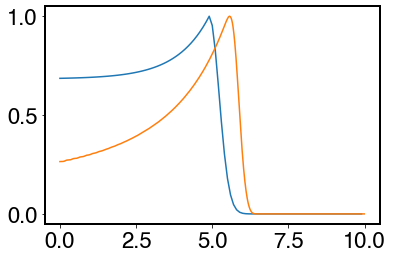

In [1258]:
ROI =np.arange(0,100,1)
print(np.argmax(O_exp_61_norm))
deconvoluted_curve= exp_mixed_curve(*conv_output_min.x)[ROI]/exp_mixed_curve(*conv_output_min.x)[ROI].max()
plt.plot(x_base[ROI],(deconvoluted_curve-deconvoluted_curve.min())/(deconvoluted_curve-deconvoluted_curve.min()).max())
plt.plot(Yield_of_d_x,Yield_of_d_O/max(Yield_of_d_O))

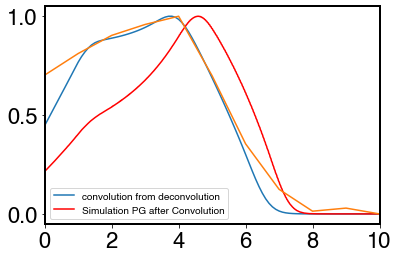

In [1259]:
atsd= exp_deconv_mixed_curve(*conv_output_min.x[:4]).dot(response_function_Matrix_norm)
plt.plot(x_base,atsd/atsd.max(),label='convolution from deconvolution')
#plt.plot(x_base,S_yield_conv_norm/100)
plt.plot(new_x,depth_yield_conved/max(depth_yield_conved),'r',label='Simulation PG after Convolution')
plt.plot(x_base,exp_y_inter[:]/exp_y_inter[:].max())
plt.xlim(0,10)
plt.legend()

    # iX  iY   iZ      total(value) [Gy]           total(val^2)  entry
0      0   0    0  1.281528697229094e-05  3.602281279572084e-15  99337
1      0   0    1  1.242756003933621e-05  5.157814467481607e-15  99335
2      0   0    2  1.231885931324565e-05   4.47675455569966e-15  99335
3      0   0    3  1.231430938622828e-05  6.427744944567919e-15  99331
4      0   0    4   1.21610448084784e-05  2.250019670485544e-15  99328
..   ...  ..  ...                    ...                    ...    ...
995    0   0  995  2.830984496784168e-10  5.887898629972925e-21     18
996    0   0  996  6.934517486581132e-10  1.307097485651886e-19     18
997    0   0  997   4.85586442003898e-10  4.819807801756234e-20     18
998    0   0  998  3.910724012783984e-10  2.504544615290241e-20     18
999    0   0  999  5.435308228115821e-10  3.697960158073927e-20     18

[1000 rows x 6 columns]
<class 'numpy.ndarray'>
[['0' '1.281528697229094e-05']
 ['1' '1.242756003933621e-05']
 ['2' '1.231885931324565e-05']
 ...
 

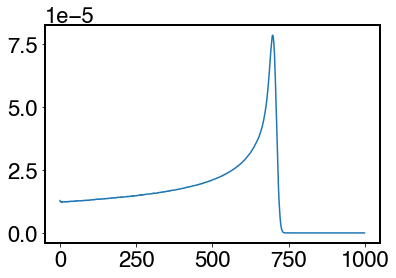

In [1278]:
df = pd.read_csv (r'2021_BraggPeak_Havar_PMMA_30MeV.csv',header=2)  #,index_col=" "
#read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"

print(df[0:1000])
mes= df[0:1000][[' iZ', ' total(value) [Gy]']].values
print(type(mes))
print(mes)
PMMA_BG= mes.astype(np.float)

      
#print(df[[' iZ', ' total(value) [Gy]']])
#PE_BG = mes[[' iZ', ' total(value) [Gy]']].values
print(PMMA_BG)
plt.plot(PMMA_BG[:,0],PMMA_BG[:,1])


print(np.argmax(PMMA_BG[:,1]))

In [1280]:
PMMA_BG_norm = PMMA_BG[:,1]/PMMA_BG[:,1].max()
print(PMMA_BG[700:720,1]/PMMA_BG[700:720,1].max())
print('7.06 mm')

[1.         0.98297684 0.96540346 0.94033469 0.90881166 0.86643545
 0.81940101 0.77139371 0.71679629 0.66274973 0.60644961 0.54271756
 0.48437399 0.42554901 0.37238307 0.31921537 0.27396779 0.23087411
 0.1920703  0.16003461]
7.06 mm


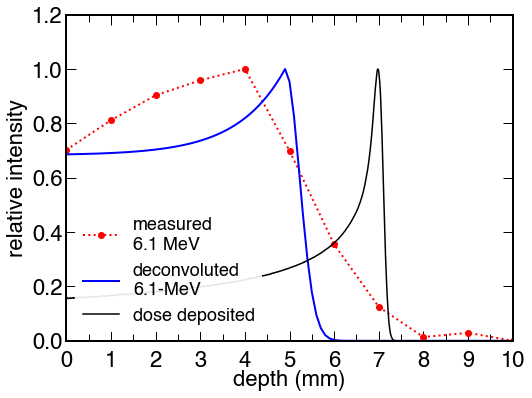

In [1296]:
# plt.rc 指令要放在最前面
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=22)          # X軸數字的文字大小
plt.rc('ytick', labelsize=22)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格




#M, xe, ye, img=plt.hist2d(Channel[:,0],PSD[:,0] , bins=(1000,1000),cmin = 1, cmap='jet')
#plt.plot(Fed_cut_result_x*4,Fed_cut_upper_smooth*0.001,'r',linewidth = 2,label='Fiducial cut')
#plt.plot(Fed_cut_result_x*4,Fed_cut_lower_smooth*0.001,'r',linewidth = 2)

plt.plot(O_exp_x,(O_exp_61_norm-O_exp_61_norm.min())/(O_exp_61_norm-O_exp_61_norm.min()).max(),':r',marker='o',linewidth=2,label='measured\n6.1 MeV')

#plt.plot(x_base
#         ,exp_deconv_mixed_curve(*conv_output_min.x)/(exp_deconv_mixed_curve(*conv_output_min.x).max())
#         ,label='deconvoluted 4.4-MeV\nPG emission')
plt.plot(x_base[ROI],
         (deconvoluted_curve-deconvoluted_curve.min())/(deconvoluted_curve-deconvoluted_curve.min()).max(),
        'b',
         linewidth=2,
         label='deconvoluted\n6.1-MeV')
plt.plot(PE_BG[:,0]*0.01,PMMA_BG_norm,'k',label='dose deposited')
#plt.plot(x_base,Simulation_Yield/Simulation_Yield.max(),label='calculated 4.4-MeV\nPG emission')
#plt.plot(PE_BG[:,0]*0.01,PE_BG[:,1]/PE_BG[:,1].max(),'k',label='dose deposited')
#plt.colorbar()
#plt.clim(0,50)  
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))    # x軸主格線的'寬度'(ex: 每10畫一個主格線)
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))     # x軸副格線的'寬度'(ex: 每5畫一個副格線)
#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線
ax.set_xlabel('depth (mm)',fontsize=22,labelpad=-2)
ax.set_ylabel('relative intensity',fontsize=22)
plt.xlim(0,10)
plt.ylim(0,1.2)
leg = plt.legend(loc='lower left',fontsize = 18,facecolor='white', framealpha=0.9)

leg.get_frame().set_linewidth(0.0)
#plt.legend(bbox_to_anchor=(0.395,0.665),fontsize = 16,facecolor='white', framealpha=1)
#plt.legend(bbox_to_anchor=(0.75,1.01),fontsize = 16,facecolor='white', framealpha=1)
ax.tick_params(axis="x",direction="in", pad=10)
#plt.title('PSP V.S Channel')
plt.savefig('Fig/Fig.10_6.1MeV_prompt_gamma_yield_ver.svg', format="svg")
plt.savefig('Fig/Fig.10_6.1MeV_prompt_gamma_yield_ver.png',dpi=300)

In [ ]:
12.5 MeV 0.1878
15   MeV 0.2604
density 1.17

In [1305]:
P_to_R=10*(0.1878+(0.2604-0.1878)*(1.5/2.5))/1.17
print(P_to_R)

1.9774358974358976


In [1304]:
R_80 = 7.04
calculated_range = cut_point/10+P_to_R
print(calculated_range)

6.877435897435898


In [856]:
(conv_output[ROI_in_fun])/conv_output[cut_point] - exp_y_inter_w_BG[ROI_in_fun]/exp_y_inter_w_BG[ROI_in_fun].max()

NameError: name 'conv_output' is not defined

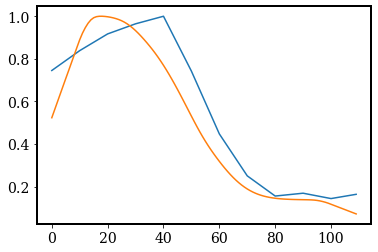

In [276]:
plt.plot(exp_y_inter_w_BG[:]/exp_y_inter_w_BG[:].max())
plt.plot(atsd/atsd.max())

# Mean energy

Finished


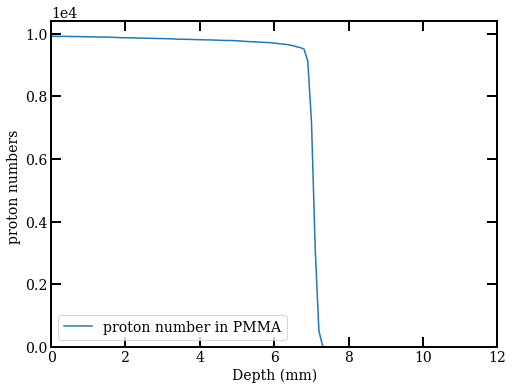

In [19]:
path = r"energy_depth.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

PMMA_data_back= pd.read_excel(writer, sheet_name = 'PMMA', index_col=None,header=0)
#print(spectrum_raw_output)
#轉成array 矩陣
#spectrum_raw_output_back=spectrum_raw_output.values
PMMA_data=PMMA_data_back.values

#plt.plot(PE_data[:,0],PE_data[:,1])


plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(PMMA_data[:,0],PMMA_data[:,3],label='proton number in PMMA')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=14)
ax.set_ylabel('proton numbers ',fontsize=14)
ax.set_xlim(0,12)
ax.set_ylim(0,)
plt.legend(loc='lower left',fontsize=14)
ax.ticklabel_format(axis='y',style='sci',scilimits=(10,3))
print("Finished")

Finished


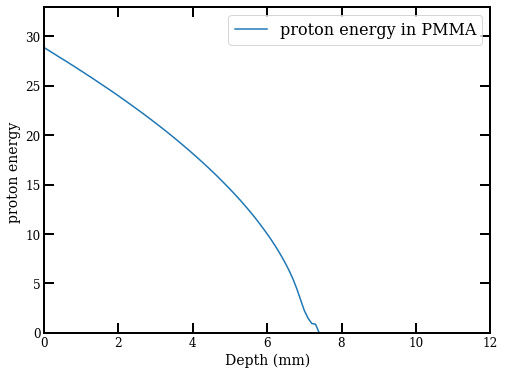

In [20]:

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(PMMA_data[:,0],PMMA_data[:,1],label='proton energy in PMMA')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=14)
ax.set_ylabel('proton energy ',fontsize=14)
ax.set_xlim(0,12)
ax.set_ylim(0,33)
plt.legend(fontsize=16)
print("Finished")

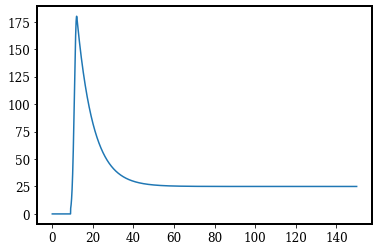

In [21]:
plt.plot(np.arange(0,len(XS_new_curve_smooth),1)*0.01,XS_new_curve_smooth)

In [22]:
XS_for_conv_mean = []
for i in np.arange(0,len(PMMA_data[:,1]),1):
    E_in_ED=PMMA_data[i,1]
    XS_for_conv_mean=np.append(XS_for_conv_mean,XS_new_curve_smooth[int(E_in_ED*100)])
print(XS_for_conv_mean)

[ 43.98369276  44.53739527  45.13239753  45.71960462  46.35061052
  46.97334955  47.61425218  48.30295869  49.01263944  49.74393318
  50.49749814  51.30687561  52.14194548  52.96854078  53.85635757
  54.8095954   55.75585354  56.73214913  57.73943567  58.82094669
  59.93818423  61.13747209  62.3779267   63.66096115  64.98803703
  66.3606661   67.83392098  69.35965278  70.93973069  72.57609052
  74.33236394  76.15347027  78.10814653  80.06863603  82.24442942
  84.43185339  86.78004001  89.30133127  91.92551838  94.6568006
  97.59022966 100.64719304 103.93149584 107.46140247 111.04155137
 115.00185984 119.14445284 123.60089464 128.26828752 133.42734692
 138.84414172 144.68105568 150.81723462 157.59910592 164.92132985
 172.83256785 179.99256182 163.65331186 122.99336431  73.70148655
  35.04215957  12.78096368   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]


(75,)


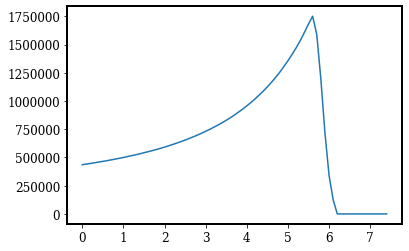

In [23]:
PG_yield_mean = XS_for_conv_mean*PMMA_data[:,3]
plt.plot(PMMA_data[:,0],PG_yield_mean)
print(PG_yield_mean.shape)

# import data

## import transfer function

In [24]:
path = r"deconvolution_tranfer_function.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

transfer_fun_back= pd.read_excel(writer, sheet_name = 'Transfer_0_613', index_col=None,header=0)
#depth_yield_back = pd.read_excel(writer, sheet_name = 'depth_yield_1min', index_col=None,header=0)
#print(spectrum_raw_output)
#轉成array 矩陣
#spectrum_raw_output_back=spectrum_raw_output.values


#print(transfer_fun_back)
#print(depth_yield_back)
print("Finished")
transfer_fun = transfer_fun_back.values
#depth_yield_exp  = depth_yield_back.values

Finished


## import experiment data

In [25]:
path = r"PE_PG_Exp.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

experiment_data_back= pd.read_excel(writer, sheet_name = 'PMMA_6.13', index_col=None,header=0)

#print(spectrum_raw_output)
#轉成array 矩陣
#spectrum_raw_output_back=spectrum_raw_output.values

experiment_data=experiment_data_back.values
print(experiment_data)
print("Finished")

[[ 0.00000000e+00  6.50410928e-01]
 [ 1.00000000e+00  7.67240022e-01]
 [ 2.00000000e+00  8.16691987e-01]
 [ 3.00000000e+00  8.73765983e-01]
 [ 3.25000000e+00  9.35278775e-01]
 [ 3.50000000e+00  9.77402796e-01]
 [ 3.75000000e+00  1.00000000e+00]
 [ 4.00000000e+00  9.98810616e-01]
 [ 4.25000000e+00  9.26123196e-01]
 [ 4.50000000e+00  9.20405185e-01]
 [ 4.75000000e+00  8.17602434e-01]
 [ 5.00000000e+00  8.15174954e-01]
 [ 5.25000000e+00  7.07005273e-01]
 [ 6.00000000e+00  4.62383880e-01]
 [ 7.00000000e+00  1.61048991e-01]
 [ 8.00000000e+00  2.23210530e-02]
 [ 9.00000000e+00  3.07862219e-03]
 [ 1.00000000e+01 -1.02910139e-08]]
Finished


## check the data

Finished


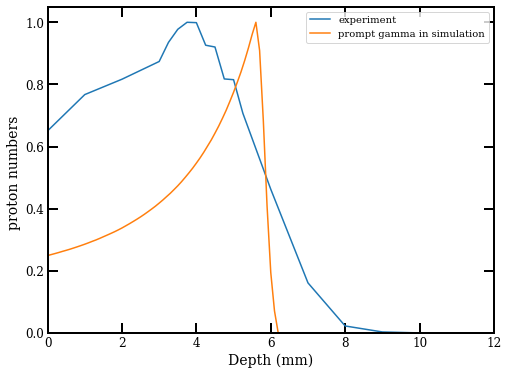

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(experiment_data[:,0],experiment_data[:,1]/experiment_data[:,1].max(),label='experiment')

plt.plot(PMMA_data[:,0],PG_yield_mean[:]/PG_yield_mean[:].max(),label='prompt gamma in simulation')


plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=14)
ax.set_ylabel('proton numbers ',fontsize=14)
ax.set_xlim(0,12)
ax.set_ylim(0,)
ax.ticklabel_format(axis='y',style='sci',scilimits=(10,3))
plt.legend()
print("Finished")

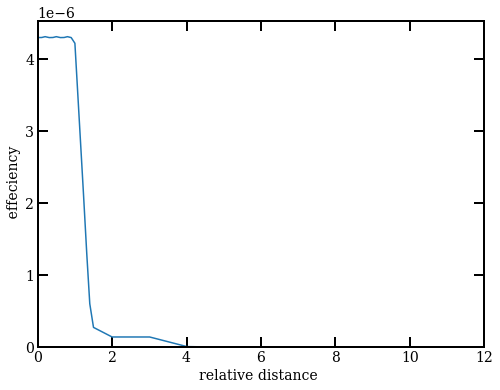

In [27]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

# 把Tranfer function 分別抓出來
transfer_fun_x= transfer_fun[:,0]
transfer_fun_y= transfer_fun[:,1]
#transfer_fun_y= (transfer_fun[:,1]/max(transfer_fun[:,1])) # Normalized
# 對Tranfer function 做 interpolation
transfer_fun_x_inter = np.arange(0,15,0.01)
transfer_fun_y_inter_temp = interp1d(transfer_fun_x, transfer_fun_y,fill_value="extrapolate") 
transfer_fun_y_inter = transfer_fun_y_inter_temp(transfer_fun_x_inter)
#transfer_fun_y_inter = signal.savgol_filter(transfer_fun_y_inter, 11, 3)
transfer_fun_inter = np.column_stack((transfer_fun_x_inter,transfer_fun_y_inter)) 
#print(transfer_fun_inter[:,1])
plt.plot(transfer_fun_inter[:,0],transfer_fun_inter[:,1])


plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('relative distance ',fontsize=14)
ax.set_ylabel(' effeciency',fontsize=14)
ax.set_xlim(0,12)
ax.set_ylim(0,)
ax.ticklabel_format(axis='y',style='sci',scilimits=(10,3))

# Convolution and plot

In [28]:
new_x =  np.arange(0,12.01,0.01)
depth_yield_conved =  convolution(np.arange(0,len(Yield_of_d_O[:]),1)*0.01,Yield_of_d_O[:],new_x )
#depth_yield_conved_mean = convolution(PMMA_data[:,0],PG_yield_mean[:],new_x)


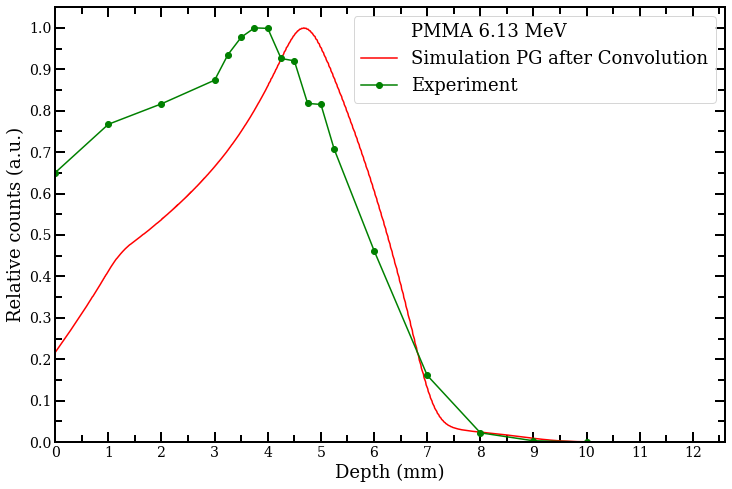

In [29]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot([], [], ' ', label="PMMA 6.13 MeV")


#ax.plot(np.arange(0,len(Yield_of_d_O[:]),1)*0.01,Yield_of_d_O[:]/max(Yield_of_d_O),'b',label='Simulation PG yield')
ax.plot(new_x,depth_yield_conved/max(depth_yield_conved),'r',label='Simulation PG after Convolution')

#ax.plot(PMMA_data[:,0],PG_yield_mean[:]/max(PG_yield_mean[:]),'y',label='Simulation PG yield(mean)')
#ax.plot(new_x,depth_yield_conved_mean/max(depth_yield_conved_mean),'r',label='Simulation PG after Convolution (mean)')

ax.plot(experiment_data[:,0],experiment_data[:,1],'o-g',label='Experiment')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=18)
ax.set_ylabel('Relative counts (a.u.)',fontsize=18)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.legend(loc='upper right',fontsize=18)

In [30]:
for i in np.arange(0,1200,1):
    if depth_yield_conved_mean[i]/max(depth_yield_conved_mean)==1:
        max_d_in_mean = i
        print('mean',max_d_in_mean)
    if depth_yield_conved[i]/max(depth_yield_conved)==1:
        max_d_in_dis = i
        print('distribution',max_d_in_dis)
print('The maximum depth in experiment is: 4 mm')
print('The maximum depth in E_d_distirbution is: ',max_d_in_dis/100,' mm')
print('The maximum depth in mean energy is: ',max_d_in_mean/100,' mm')

NameError: name 'depth_yield_conved_mean' is not defined

# import the mean energy data

Finished
75


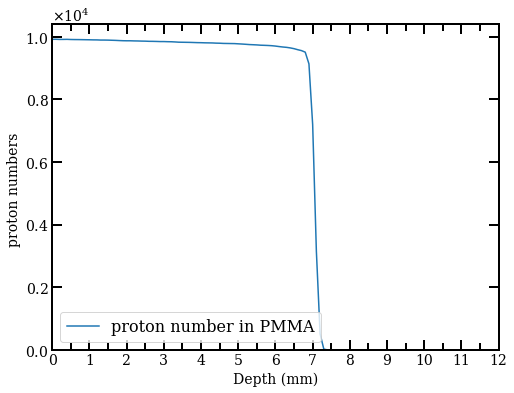

In [31]:
path = r"energy_depth.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

PE_data_meanE_back= pd.read_excel(writer, sheet_name = 'PMMA', index_col=None,header=0)
#print(spectrum_raw_output)
#轉成array 矩陣
#spectrum_raw_output_back=spectrum_raw_output.values
PE_data_meanE=PE_data_meanE_back.values

#plt.plot(PE_data[:,0],PE_data[:,1])


plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(PE_data_meanE[:,0],PE_data_meanE[:,3],label='proton number in PMMA')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=14)
ax.set_ylabel('proton numbers ',fontsize=14)
ax.set_xlim(0,12)
ax.set_ylim(0,)
ax.ticklabel_format(axis='y',style='sci',scilimits=(10,3),useMathText=True)
plt.legend(loc='lower left',fontsize=16)
print("Finished")
print(len(PE_data_meanE[:,3]))

Finished


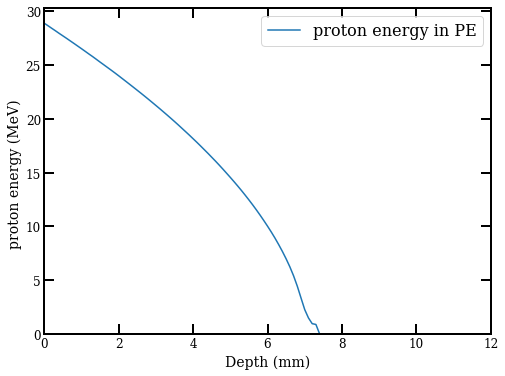

In [32]:

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(PE_data_meanE[:,0],PE_data_meanE[:,1],label='proton energy in PE')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=14)
ax.set_ylabel('proton energy (MeV) ',fontsize=14)
ax.set_xlim(0,12)
ax.set_ylim(0,)
plt.legend(fontsize=16)
print("Finished")

[ 43.98369276  44.53739527  45.13239753  45.71960462  46.35061052
  46.97334955  47.61425218  48.30295869  49.01263944  49.74393318
  50.49749814  51.30687561  52.14194548  52.96854078  53.85635757
  54.8095954   55.75585354  56.73214913  57.73943567  58.82094669
  59.93818423  61.13747209  62.3779267   63.66096115  64.98803703
  66.3606661   67.83392098  69.35965278  70.93973069  72.57609052
  74.33236394  76.15347027  78.10814653  80.06863603  82.24442942
  84.43185339  86.78004001  89.30133127  91.92551838  94.6568006
  97.59022966 100.64719304 103.93149584 107.46140247 111.04155137
 115.00185984 119.14445284 123.60089464 128.26828752 133.42734692
 138.84414172 144.68105568 150.81723462 157.59910592 164.92132985
 172.83256785 179.99256182 163.65331186 122.99336431  73.70148655
  35.04215957  12.78096368   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]


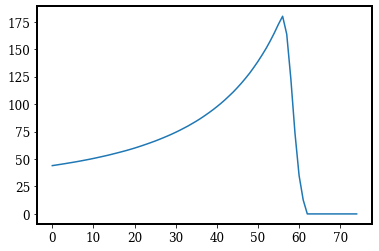

In [33]:
XS_for_conv = []
for i in np.arange(0,len(PE_data_meanE[:,1]),1):
    E_in_ED=PE_data_meanE[i,1]
    XS_for_conv=np.append(XS_for_conv,XS_new_curve_smooth[int(E_in_ED*100)])
print(XS_for_conv)
plt.plot(XS_for_conv)

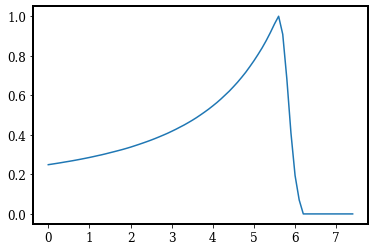

In [34]:
PG_yield_mean = XS_for_conv*PE_data_meanE[:,3]
plt.plot(PE_data_meanE[:,0],PG_yield_mean/PG_yield_mean.max())

Finished


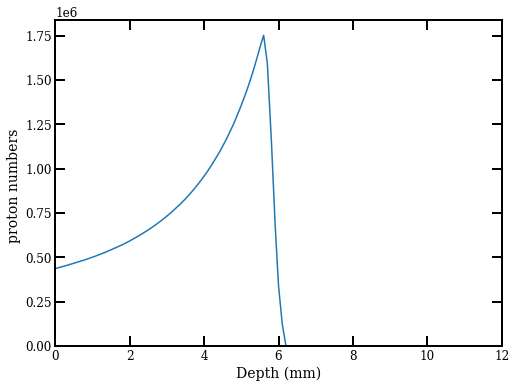

In [35]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

origianl_x =  np.arange(0,12.01,0.01)
PG_yield_inter_temp=  interp1d(PE_data_meanE[:,0], PG_yield_mean,fill_value="extrapolate") 
PG_yield_inter_mean = PG_yield_inter_temp(origianl_x)
#Depth_inter =  np.arange(0,10.01,0.01)
plt.plot(origianl_x,PG_yield_inter_mean)


plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=14)
ax.set_ylabel('proton numbers ',fontsize=14)
ax.set_xlim(0,12)
ax.set_ylim(0,)
ax.ticklabel_format(axis='y',style='sci',scilimits=(10,3))

print("Finished")

No handles with labels found to put in legend.


Finished


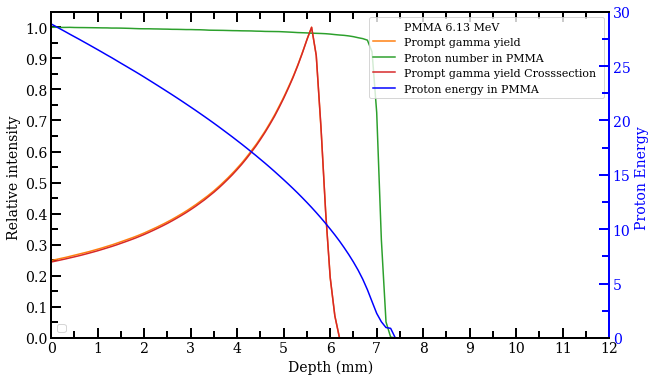

In [44]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

#origianl_x =  np.arange(0,12.01,0.01)
#PG_yield_inter_temp=  interp1d(PE_data_meanE[:,0], PG_yield_mean,fill_value="extrapolate") 
#PG_yield_inter_mean = PG_yield_inter_temp(origianl_x)

plt.plot([],[],' ',label='PMMA 6.13 MeV')
plt.plot(origianl_x,PG_yield_inter_mean/PG_yield_inter_mean.max(),label='Prompt gamma yield')
plt.plot(PE_data_meanE[:,0],PE_data_meanE[:,3]/PE_data_meanE[:,3].max(),label='Proton number in PMMA')
plt.plot(np.arange(0,len(XS_for_conv),1)/10,XS_for_conv/XS_for_conv.max(),label='Prompt gamma yield Crosssection ')
plt.plot([],[],'b',label='Proton energy in PMMA')

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

# Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))    # x軸主格線的'寬度'(ex: 每10畫一個主格線)
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))     # x軸副格線的'寬度'(ex: 每5畫一個副格線)
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=14)
ax.set_ylabel('Relative intensity ',fontsize=14)
ax.set_xlim(0,14)
ax.set_ylim(0,)
ax.ticklabel_format(axis='y',style='sci',scilimits=(10,3))
plt.legend(loc='upper right',fontsize=11)
print("Finished")

ax2 = ax.twinx()
plt.plot(PE_data_meanE[:,0],PE_data_meanE[:,1],'b')

# Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))    # x軸主格線的'寬度'(ex: 每10畫一個主格線)
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))     # x軸副格線的'寬度'(ex: 每5畫一個副格線)
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))

ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on',color='blue')
ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on',color='blue')
ax2.spines['right'].set_color('blue')
ax2.tick_params(axis='y', colors='blue')
ax2.set_xlabel('Depth (mm)',fontsize=14)
ax2.set_ylabel('Proton Energy ',fontsize=14,color='blue')
ax2.xaxis.label.set_color('blue')
ax2.set_xlim(0,12)
ax2.set_ylim(0,30)
#ax2.ticklabel_format(axis='y',style='sci',scilimits=(10,3))
plt.legend(loc='lower left',fontsize=11)

In [ ]:
print(np.argmax(PG_yield_inter_mean))

## convolute mean energy data

In [ ]:
new_x =  np.arange(0,12.01,0.01)
depth_yield_conved =  convolution(np.arange(0,len(Yield_of_d_O[:]),1)*0.01,Yield_of_d_O[:],new_x )
depth_yield_conved_mean =  convolution(origianl_x,PG_yield_inter_mean,new_x )


# Total plot !

In [ ]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot([], [], ' ', label="PE Carbon 4.4 MeV")


ax.plot(np.arange(0,len(Yield_of_d_O),1)/100,Yield_of_d_O/max(Yield_of_d_O),'b',label='Simulation PG yield by energy group')
ax.plot(new_x,depth_yield_conved/max(depth_yield_conved),'c',label='Simulation PG after Convolution by energy group')

ax.plot(origianl_x,PG_yield_inter_mean/PG_yield_inter_mean.max(),'y',label='simulation PG yield by mean energy')
ax.plot(new_x,depth_yield_conved_mean/max(depth_yield_conved_mean),'r',label='Simulation PG yield after Convolution by mean energy')

ax.plot(experiment_data[:,0],experiment_data[:,1],'o-g',label='Experiment')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=18)
ax.set_ylabel('relative counts (a.u.)',fontsize=18)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xlim(0,11.5)
ax.set_ylim(0,)
plt.legend(loc='lower left',fontsize=12)

In [ ]:

depth_yield_conved_mean_nor = depth_yield_conved_mean/max(depth_yield_conved_mean)
output_data=np.column_stack((new_x,depth_yield_conved_mean_nor))
XS_new_curve_smooth_O_pd = pd.DataFrame(output_data)
#spectrum_raw_pd.to_excel('20191231_PMMA_data/20191231_PMMA_5min.xlsx', sheet_name='1mm', index=False, header=True)


path = r'Cross_section_fitting.xlsx'

book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

XS_new_curve_smooth_O_pd.to_excel(writer, sheet_name = 'PMMA_6.13MeV_after convolution', index=False)
writer.save()
writer.close()

print("Finished")

In [ ]:
#print('mean',max(depth_yield_conved_mean/max(depth_yield_conved_mean)))
#print('distribution',max(depth_yield_conved/max(depth_yield_conved)))
#print('experiment',experiment_data[:,1].max())
for i in np.arange(0,1200,1):
    if depth_yield_conved_mean[i]/max(depth_yield_conved_mean)==1:
        max_d_in_mean = i
        print('mean',max_d_in_mean)
    if depth_yield_conved[i]/max(depth_yield_conved)==1:
        max_d_in_dis = i
        print('distribution',max_d_in_dis)
print('The maximum depth in experiment is: 5.5 mm')
print('The maximum depth in E_d_distirbution is: ',max_d_in_dis/100,' mm')
print('The maximum depth in mean energy is: ',max_d_in_mean/100,' mm')

#  mean energy and consider std

Finished


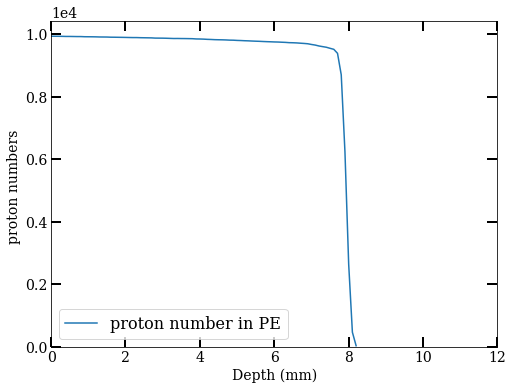

In [248]:
path = r"energy_depth.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

PE_data_meanE_back= pd.read_excel(writer, sheet_name = 'PE', index_col=None,header=0)
#print(spectrum_raw_output)
#轉成array 矩陣
#spectrum_raw_output_back=spectrum_raw_output.values
PE_data_meanE=PE_data_meanE_back.values

#plt.plot(PE_data[:,0],PE_data[:,1])


plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(PE_data_meanE[:,0],PE_data_meanE[:,3],label='proton number in PE')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=14)
ax.set_ylabel('proton numbers ',fontsize=14)
ax.set_xlim(0,12)
ax.set_ylim(0,)
ax.ticklabel_format(axis='y',style='sci',scilimits=(10,3))
plt.legend(fontsize=16)
print("Finished")

In [260]:
500+1500+750+400+550+1300+600+420+60


6080

Finished


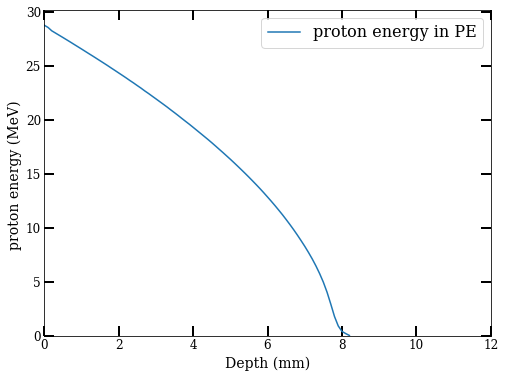

In [241]:

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(PE_data_meanE[:,0],PE_data_meanE[:,1],label='proton energy in PE')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=14)
ax.set_ylabel('proton energy (MeV) ',fontsize=14)
ax.set_xlim(0,12)
ax.set_ylim(0,)
plt.legend(fontsize=16)
print("Finished")

In [242]:
XS_for_conv = []
for i in np.arange(0,len(PE_data_meanE[:,1]),1):
    E_in_ED=PE_data_meanE[i,1]
    XS_for_conv=np.append(XS_for_conv,XS_new_curve_smooth[int(E_in_ED*100)])
print(XS_for_conv)

[ 75.87052242  76.87545299  78.47370656  79.58513189  80.72034433
  81.82407971  83.06417782  84.27384999  85.50941197  86.83218259
  88.12249889  89.50388849  90.91626659  92.29399186  93.76895994
  95.27701575  96.81890156  98.39537626 100.08133428 101.80685229
 103.57285854 105.38030306 107.23015818 109.20673501 111.14637505
 113.21888739 115.34217003 117.60925154 119.84008488 122.22200093
 124.66472877 127.16982096 129.73886969 132.48028115 135.29451899
 138.18351788 141.26489117 144.43131347 147.68513221 151.02875962
 154.59373594 158.26080523 162.03289119 165.91300128 170.04886768
 174.3074683  178.84595053 183.68220929 188.50863135 193.65172211
 199.13207982 204.79216742 210.82361462 217.05914963 223.50567824
 230.58143115 237.91137658 245.50464625 253.82862918 262.46905516
 271.9323583  282.03275487 292.54889186 304.05700983 316.06300058
 328.06364679 363.55808853 389.97984574 260.21146362  99.49232187
  20.93315434   0.           0.           0.           0.
   0.           0.

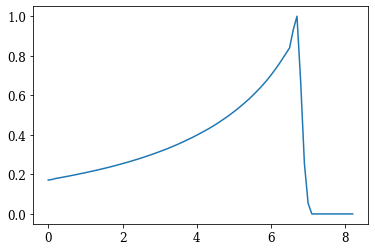

In [243]:
# PG_yield_mean = XS_for_conv*PE_data_meanE[:,3]
plt.plot(PE_data_meanE[:,0],PG_yield_mean/PG_yield_mean.max())

Finished


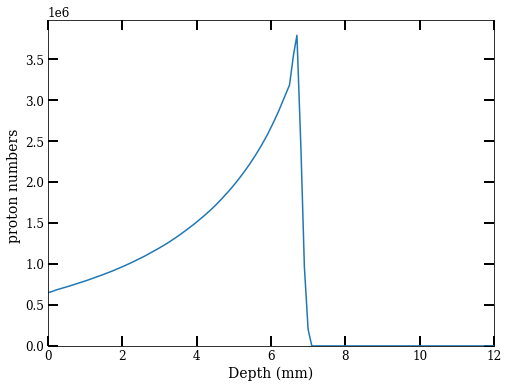

In [244]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

origianl_x =  np.arange(0,12.01,0.01)
PG_yield_inter_temp=  interp1d(PE_data_meanE[:,0], PG_yield_mean,fill_value="extrapolate") 
PG_yield_inter_mean = PG_yield_inter_temp(origianl_x)
#Depth_inter =  np.arange(0,10.01,0.01)
plt.plot(origianl_x,PG_yield_inter_mean)


plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.set_xlabel('Depth (mm)',fontsize=14)
ax.set_ylabel('proton numbers ',fontsize=14)
ax.set_xlim(0,12)
ax.set_ylim(0,)
ax.ticklabel_format(axis='y',style='sci',scilimits=(10,3))

print("Finished")

# backup slide

In [117]:
# 把Tranfer function 分別抓出來
transfer_fun_x= transfer_fun[:,0]
transfer_fun_y= transfer_fun[:,1]
#transfer_fun_y= (transfer_fun[:,1]/max(transfer_fun[:,1])) # Normalized
#transfer_fun_y = transfer_fun_y/transfer_fun_y.sum()
# 對Tranfer function 做 interpolation
transfer_fun_x_inter = np.arange(-5,30,0.01)
transfer_fun_y_inter_temp = interp1d(transfer_fun_x, transfer_fun_y,fill_value="extrapolate") 
transfer_fun_y_inter = transfer_fun_y_inter_temp(transfer_fun_x_inter)
#transfer_fun_y_inter = signal.savgol_filter(transfer_fun_y_inter, 31, 3)
transfer_fun_inter = np.column_stack((transfer_fun_x_inter,transfer_fun_y_inter)) 
print(transfer_fun_inter[:,1])

# 把 depth_yield 分別抓出來
depth_yield_x = depth_yield[:,0]
depth_yield_y = depth_yield[:,1]
#depth_yield_y = depth_yield[:,1]/max(depth_yield_y)
#depth_yield_y = depth_yield_y/depth_yield_y.sum()
# 對 depth_yield 做 interpolation
depth_yield_x_inter = np.arange(-20,20,0.01)
depth_yield_y_inter_temp = interp1d(depth_yield_x, depth_yield_y,fill_value="extrapolate") 
depth_yield_y_inter = depth_yield_y_inter_temp(depth_yield_x_inter)
depth_yield_y_inter_smooth=depth_yield_y_inter
#depth_yield_y_inter = signal.savgol_filter(depth_yield_y_inter_smooth, 51, 3)

depth_yield_inter = np.column_stack((depth_yield_x_inter,depth_yield_y_inter))
print(depth_yield_inter[:,1])

transfer_fun_y_inter_nor = transfer_fun_y_inter/ transfer_fun_y_inter.sum()
depth_yield_y_inter_nor  = depth_yield_y_inter / depth_yield_y_inter.sum()

[0.e+00 2.e-10 4.e-10 ... 0.e+00 0.e+00 0.e+00]
[0. 0. 0. ... 0. 0. 0.]


1e-08
0.0


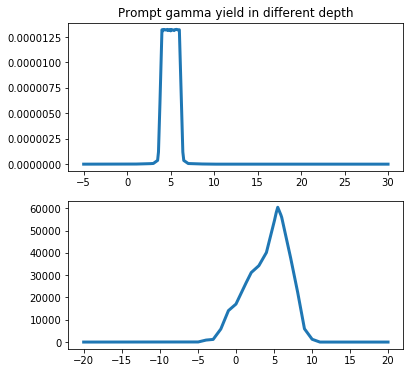

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = False, sharey = False, figsize = (6, 6))
ax1.plot(transfer_fun_inter[:,0], transfer_fun_inter [:,1], label="Transfer function", lw=3)
ax1.set_title('Transfer function')
print(transfer_fun_inter[:,1].min())
ax2.plot(depth_yield_inter[:,0], depth_yield_inter[:,1], label="PG depth yield", lw=3)
print(depth_yield_inter[:,1].min())
ax1.set_title('Prompt gamma yield in different depth')
plt.show()

1e-08


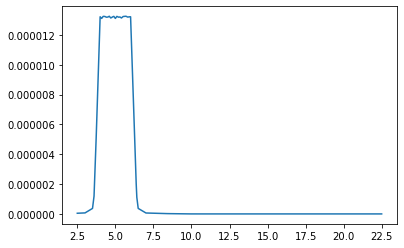

In [6]:
####Rescale Transfer function
transfer_fun_inter=transfer_fun_inter[750:2750,:]
plt.plot(transfer_fun_inter[:,0],transfer_fun_inter[:,1])
print(transfer_fun_inter[:,1].min())

In [7]:
print(depth_yield_inter[:,1].shape)
print(transfer_fun_inter[:,1].shape)
oringinal_fun , remainder_2 = scipy.signal.deconvolve( depth_yield_inter[:,1],transfer_fun_inter [:,1])
#oringinal_fun , remainder_2 = scipy.signal.deconvolve(depth_yield_y_inter_nor,transfer_fun_y_inter_nor)
print(oringinal_fun.shape)

(4000,)
(2000,)
(2001,)


In [8]:
print(oringinal_fun.shape)
original_depth_yield_x= np.arange(0,len(oringinal_fun)/100-0.005,0.01)
print(original_depth_yield_x.shape)

(2001,)
(2001,)


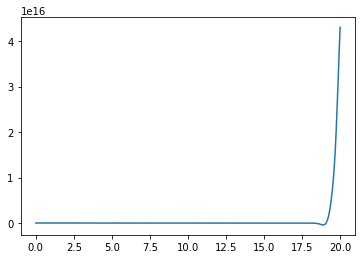

In [9]:
#original_depth_yield_x2=np.arange(10,30.005,0.01)
plt.plot(original_depth_yield_x,oringinal_fun[:])
#plt.ylim(0,)
#plt.xlim(20,25)


In [229]:
yc = scipy.signal.convolve(oringinal_fun, transfer_fun_inter [:,1], mode='full')
print(yc.shape)

(4000,)


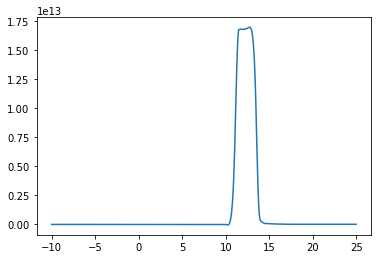

In [230]:
yc_x= np.arange(-10,30,0.01)
plt.plot(yc_x[:3500],yc[:3500])

ValueError: x and y must have same first dimension, but have shapes (3501,) and (2001,)

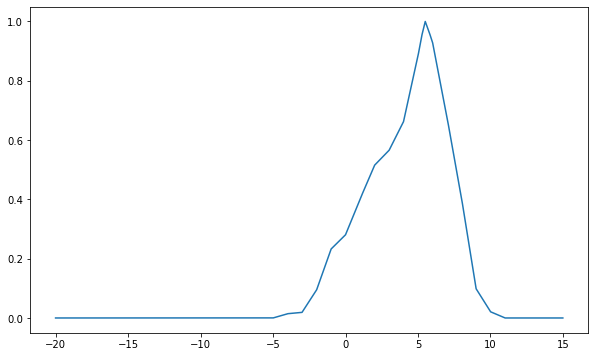

In [222]:
plt.figure(figsize=(10,6))
original_depth_yield_x2=np.arange(-10,25.005,0.01)
plt.plot(depth_yield_inter[0:3500,0], depth_yield_inter[0:3500,1]/max(depth_yield_inter[:,1]), label="PG depth yield")
plt.plot(original_depth_yield_x2,oringinal_fun[:]/max(oringinal_fun[:]), label="After Deconvolution")
plt.plot(yc_x[:3500],yc[:3500]/max(yc[:3500]),"--r", label="After Deconvolution and convolution")
plt.legend(loc='upper left')

In [ ]:

# let the signal be box-like
signal = np.repeat([0., 1., 0.], 100)
# and use a gaussian filter
# the filter should be shorter than the signal
# the filter should be such that it's much bigger then zero everywhere
gauss = np.exp(-( (np.linspace(0,50)-25.)/float(12))**2 )
print (gauss.min())  # = 0.013 >> 0

# calculate the convolution (np.convolve and scipy.signal.convolve identical)
# the keywordargument mode="same" ensures that the convolution spans the same
#   shape as the input array.
#filtered = scipy.signal.convolve(signal, gauss, mode='same') 
filtered = np.convolve(signal, gauss, mode='same') 

deconv,  _ = scipy.signal.deconvolve( filtered, gauss )
#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(signal)-len(gauss)+1
# so we need to expand it by 
s = (len(signal)-n)/2
#on both sides.
deconv_res = np.zeros(len(signal))
deconv_res[s:len(signal)-s-1]= deconv 
deconv = deconv_res
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 


#### Plot #### 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))

ax[0].plot(signal,            color="#907700", label="original",     lw=3 ) 
ax[1].plot(gauss,          color="#68934e", label="gauss filter", lw=3 )
# we need to divide by the sum of the filter window to get the convolution normalized to 1
ax[2].plot(filtered/np.sum(gauss), color="#325cab", label="convoluted" ,  lw=3 )
ax[3].plot(deconv,         color="#ab4232", label="deconvoluted", lw=3 ) 

for i in range(len(ax)):
    ax[i].set_xlim([0, len(signal)])
    ax[i].set_ylim([-0.07, 1.2])
    ax[i].legend(loc=1, fontsize=11)
    if i != len(ax)-1 :
        ax[i].set_xticklabels([])

plt.savefig(__file__ + ".png")
plt.show()    

In [310]:
import numpy
 
h = [-8,-9,-3,-1,-6,7]
f = [-3,-6,-1,8,-6,3,-1,-9,-9,3,-2,5,2,-2,-7,-1]
g = [24,75,71,-34,3,22,-45,23,245,25,52,25,-67,-96,96,31,55,36,29,-43,-7]
 
# https://stackoverflow.com/questions/14267555/find-the-smallest-power-of-2-greater-than-n-in-python
 
def shift_bit_length(x):
    return 1<<(x-1).bit_length()
 
def conv(a, b):
    p = len(a)
    q = len(b)
    n = p + q - 1
    r = shift_bit_length(n)
    y = numpy.fft.ifft(numpy.fft.fft(a,r) * numpy.fft.fft(b,r),r)
    return numpy.trim_zeros(numpy.around(numpy.real(y),decimals=6))
 
def deconv(a, b):
    p = len(a)
    q = len(b)
    n = p - q + 1
    r = shift_bit_length(max(p, q))
    y = numpy.fft.ifft(numpy.fft.fft(a,r) / numpy.fft.fft(b,r), r)
    return numpy.trim_zeros(numpy.around(numpy.real(y),decimals=6))
 
# should return g
 
print(conv(h,f))
 
# should return h
 
print(deconv(g,f))
 
# should return f
 
print(deconv(g,h))
 
 

[ 24.  75.  71. -34.   3.  22. -45.  23. 245.  25.  52.  25. -67. -96.
  96.  31.  55.  36.  29. -43.  -7.]
[-8. -9. -3. -1. -6.  7.]
[-3. -6. -1.  8. -6.  3. -1. -9. -9.  3. -2.  5.  2. -2. -7. -1.]
